In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("final_dataset.csv")

In [5]:
df.head()

,index,role,committype,fileextensions,numfileschanged,linesadded,linesdeleted,numcommentsadded,timeofcommit,commitmessage
0,0,frontend,feature,[np.str_('js_ts')],4,312,100,2,Friday 17:00,"""Implement responsive UI component with dropdo..."
1,1,frontend,feature,[np.str_('css')],4,191,74,2,Friday 20:00,"""Refactor UI components: Implement responsive ..."
2,2,fullstack,feature,[np.str_('html')],4,275,146,4,Thursday 21:00,"""feat: Implement responsive UI layout with mod..."
3,3,frontend,refactor,[np.str_('js_ts')],4,245,164,2,Thursday 18:00,"""Refactored UI components for responsive layou..."
4,4,fullstack,feature,"[np.str_('js_ts'), np.str_('html')]",2,692,378,5,Sunday 20:00,"""feat: Implement responsive UI layout for logi..."


In [6]:
X=df['role']
len(X)

1500

In [41]:
df[df.duplicated()==True]
#No duplicates to drop

,index,committype,fileextensions,numfileschanged,linesadded,linesdeleted,numcommentsadded,timeofcommit,commitmessage,role


In [7]:
#Basic raw Datset overview:

#Checking for NULL in any row
df_check_null=df.isna().sum(axis=1)
if(df_check_null>0).any():
    print("NULL found")
else:
    print("No NULLs")

raw = df.copy()

y=raw['role']
X=raw.drop(columns=['role'])
role_categories=y.value_counts()
print(role_categories)

categorical_cols = df.select_dtypes(include=['object','category']).columns.to_list()
numeric_cols=df.select_dtypes(include=['number']).columns.to_list()

print("Category_cols:",categorical_cols,"\nNumeric_cols:",numeric_cols)
eda_summary = []
for col in raw.columns:
    col_data=raw[col]
    col_type=raw[col].dtype
    if col in numeric_cols:
        stats={"column":col,
                "dtype":col_type,
                "nulls":col_data.isna().sum(),
                "min": col_data.min(),
                "max": col_data.max(),
                "mean": col_data.mean(),
                "std": col_data.std(),
                "skew": col_data.skew()}
    else:
        stats = {
                "column": col,
                "dtype": col_type,
                "nulls": col_data.isna().sum(),
                "number_unique":col_data.nunique(),
                "top_values": col_data.value_counts().head(10).to_dict()

            }
    eda_summary.append(stats)
        
eda_summary_df = pd.DataFrame(eda_summary)
    

print("Duplicate rows:", df.duplicated().sum())





No NULLs
role
backend      484
frontend     444
qa           313
fullstack    259
Name: count, dtype: int64
Category_cols: ['role', 'committype', 'fileextensions', 'timeofcommit', 'commitmessage'] 
Numeric_cols: ['index', 'numfileschanged', 'linesadded', 'linesdeleted', 'numcommentsadded']
Duplicate rows: 0


In [8]:
eda_summary_df

,column,dtype,nulls,min,max,mean,std,skew,number_unique,top_values
0,index,int64,0,0.0,1499.0,749.500000,433.157015,0.000000,NaN,NaN
1,role,object,0,NaN,NaN,NaN,NaN,NaN,4.0,"{'backend': 484, 'frontend': 444, 'qa': 313, '..."
2,committype,object,0,NaN,NaN,NaN,NaN,NaN,4.0,"{'feature': 596, 'bugfix': 421, 'test': 279, '..."
3,fileextensions,object,0,NaN,NaN,NaN,NaN,NaN,278.0,"{'[np.str_('py')]': 202, '[np.str_('js_ts')]':..."
4,numfileschanged,int64,0,1.0,18.0,3.810667,2.544891,1.048190,NaN,NaN
5,linesadded,int64,0,8.0,3038.0,183.698667,258.709634,4.795565,NaN,NaN
6,linesdeleted,int64,0,1.0,1992.0,92.474000,150.131266,5.073943,NaN,NaN
7,numcommentsadded,int64,0,0.0,12.0,3.164667,1.891367,0.763907,NaN,NaN
8,timeofcommit,object,0,NaN,NaN,NaN,NaN,NaN,160.0,"{'Wednesday 15:00': 27, 'Friday 19:00': 25, 'T..."
9,commitmessage,object,0,NaN,NaN,NaN,NaN,NaN,1462.0,"{'""Fixed authentication logic in backend API: ..."


The dataset has no missing values or duplicates, so it is structurally sound. The target role has four categories with some imbalance (mostly wont affect). Categorical features like committype and timeofcommit look consistent,but fileextensions is clearly messy (e.g., [np.str_('py')] instead of clean py), so cleaning/normalization is necessary. Numeric fields (numfileschanged, linesadded, linesdeleted, numcommentsadded) are well-populated but heavily skewed.At this point we cannot comment on the text section as the semantic meaning cannot be understood through raw numbers and a feature extraction like BOW/or vectorizrions is neccesary.

In [9]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=['role'])
y=df['role']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

df = X_train
df['role'] = y_train
print(len(X))


1500


In [10]:
df.head()

,index,committype,fileextensions,numfileschanged,linesadded,linesdeleted,numcommentsadded,timeofcommit,commitmessage,role
382,382,test,[np.str_('test_py')],2,11,3,2,Saturday 23:00,Refactored test_py to improve model training d...,qa
538,538,bugfix,[np.str_('yml_json')],1,104,53,4,Thursday 10:00,"""Fixed authentication logic in backend API: co...",backend
1493,1493,refactor,"[np.str_('py'), np.str_('css')]",2,49,33,4,Thursday 11:00,Refactored UI component layout to improve resp...,fullstack
1112,1112,bugfix,[np.str_('sql')],2,299,162,3,Wednesday 14:00,Fixed database query logic for login endpoint ...,backend
324,324,feature,"[np.str_('py'), np.str_('js_ts')]",1,167,82,8,Wednesday 17:00,"""Feature: Implement API authentication logic w...",backend


role            backend  frontend  fullstack  qa
fileextensions                                  
css                  31        98         54  17
html                 35        87         43  23
java_go             123        23         47  20
js_ts                50       153        105  46
md                   11        13          7   3
py                  198        44         85  33
sql                  80        14         33  11
test_js              15        31         32  98
test_py              15        10         17  83
yml_json             16        20         24  40


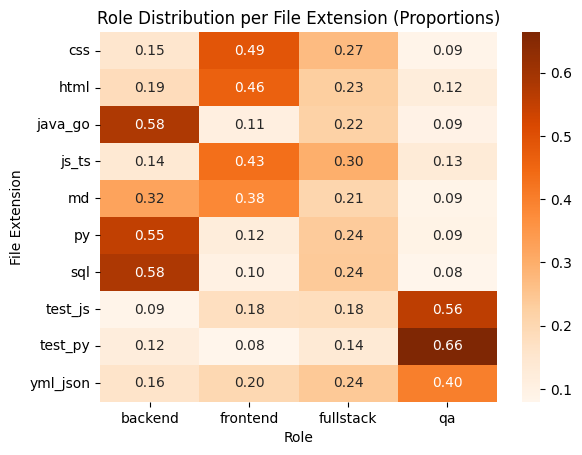

In [11]:
#Preprocessing/Cleaning of data before EDA of cleaned data: 
import seaborn as sns
import matplotlib.pyplot as plt
import ast
df_clean=df.copy()
#Removing np.str and extracting actual file names 
cleaned_extensions = []
for index,row in df_clean.iterrows(): 
    temp_list=[]
    s=row['fileextensions']
    s = s.replace("np.str_", "")   
    real_list = ast.literal_eval(s)
    # print(type(real_list))
    for ele in real_list:
        temp_list.append(ele)
    cleaned_extensions.append(temp_list)
df_clean['fileextensions'] = cleaned_extensions

df_clean = df_clean.explode('fileextensions')
role_ext_ct = pd.crosstab(df_clean['fileextensions'],df_clean['role'])
print(role_ext_ct.head(10))

role_ext_prop = role_ext_ct.div(role_ext_ct.sum(axis=1), axis=0)


sns.heatmap(role_ext_prop, annot=True, fmt=".2f", cmap="Oranges")
plt.title("Role Distribution per File Extension (Proportions)")
plt.ylabel("File Extension")
plt.xlabel("Role")
plt.show()


Before doing EDA, I cleaned the fileextensions column, which originally had values like np.str_('js'). I removed the extra part and extracted proper file names. Since commits can involve multiple file types, I exploded the column so each extension appeared on its own row. Then, I created a crosstab to count occurrences of each extension across roles and made a heatmap using seaborn. The heatmap clearly shows how extensions map to roles: .css and .html link strongly to frontend, .py, .sql, and .java/go to backend, while .js_ts overlaps between frontend and fullstack. Test files and config files (test_py, test_js, yml_json) are dominant in QA work. These patterns highlight that file extensions themselves carry strong signals about developer roles which might influence the final prediction strongly.

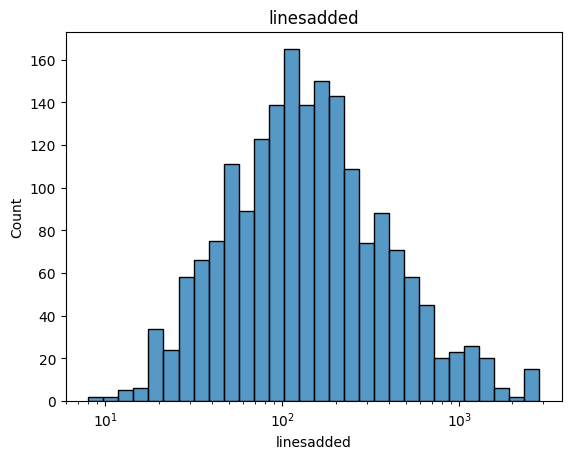

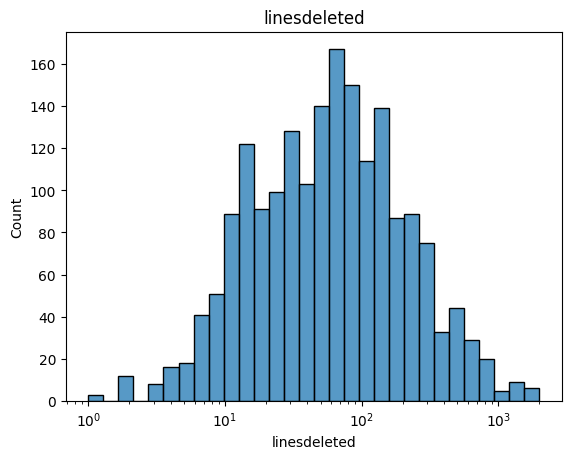

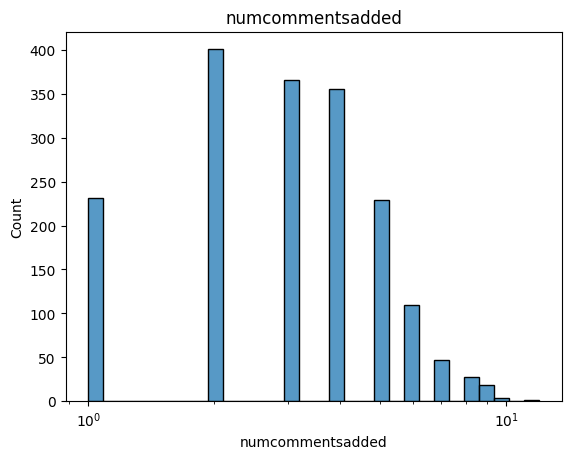

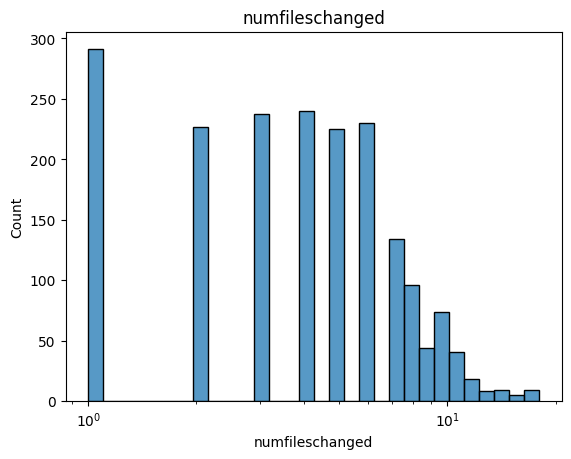

In [12]:
#Visualization for binning
for col in ['linesadded','linesdeleted','numcommentsadded','numfileschanged']:
    sns.histplot(df_clean[col], bins=30, log_scale=(True, False))
    plt.title(col)
    plt.show()



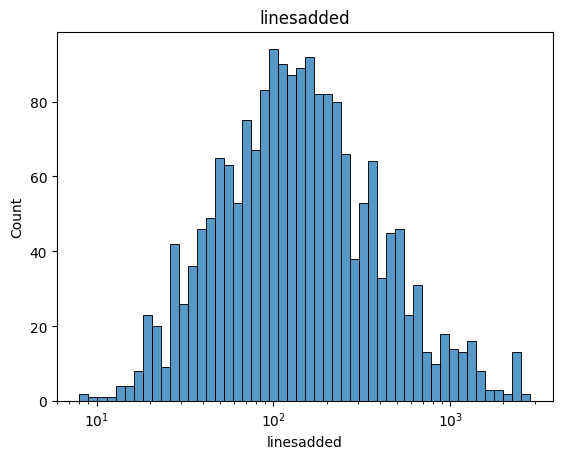

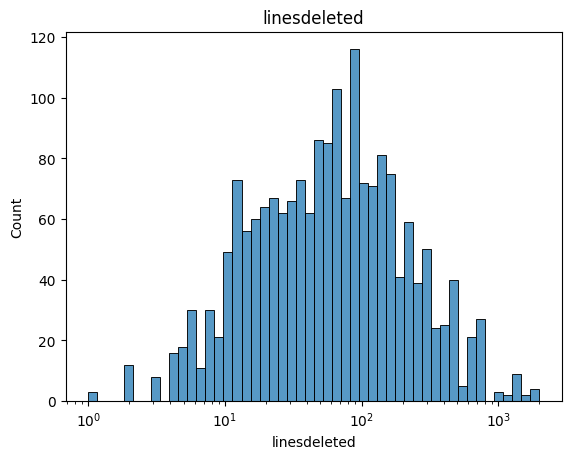

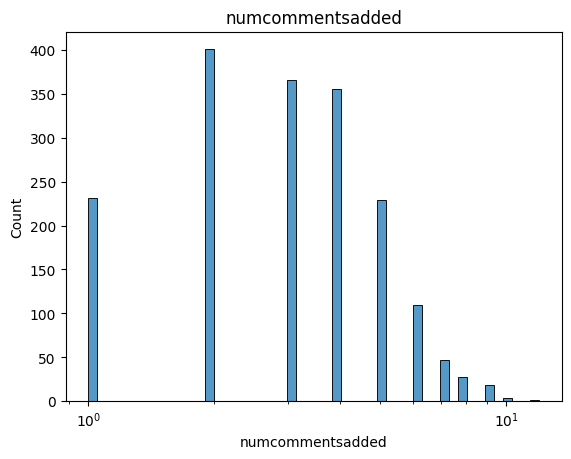

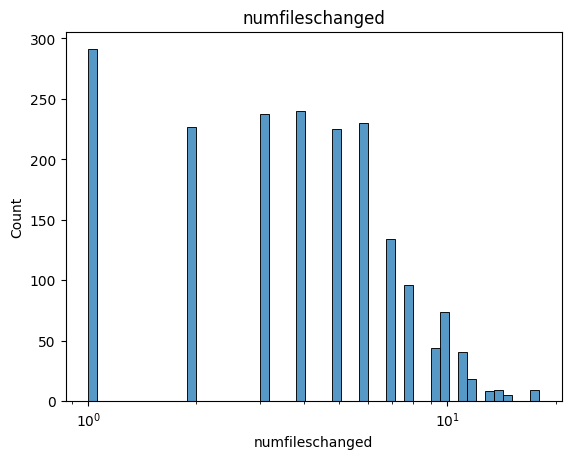

In [13]:
#Visualization for binning
for col in ['linesadded','linesdeleted','numcommentsadded','numfileschanged']:
    sns.histplot(df_clean[col], bins=50, log_scale=(True, False))
    plt.title(col)
    plt.show()



To understand how features like lines added,lines deleted,comments and files changed were distributed, I first checked histograms with different bin sizes (50 and 30 bins).This gave a better idea of the data distribution and helped me decide how to group the values. I then made categories such as tiny, small, medium, large, huge for code changes, none, few, some, many for comments, and single, small, medium, large for files changed. I also grouped commit hours into time ranges like morning and evening. Binning is helpful because it makes the data easier to understand and can reveal patterns that raw numbers might hide.It can also be risky if the bins are not chosen well as that might hide useful details and small specs.

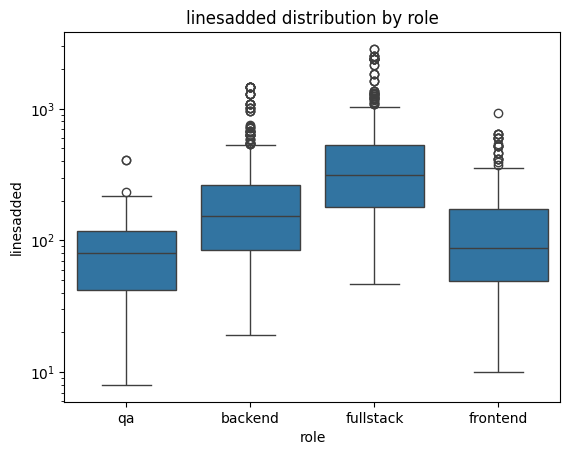

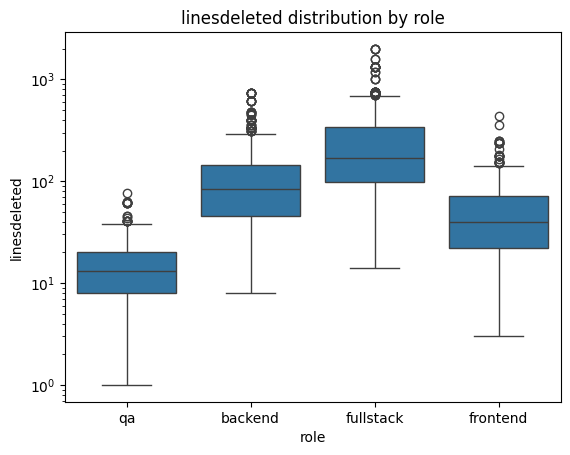

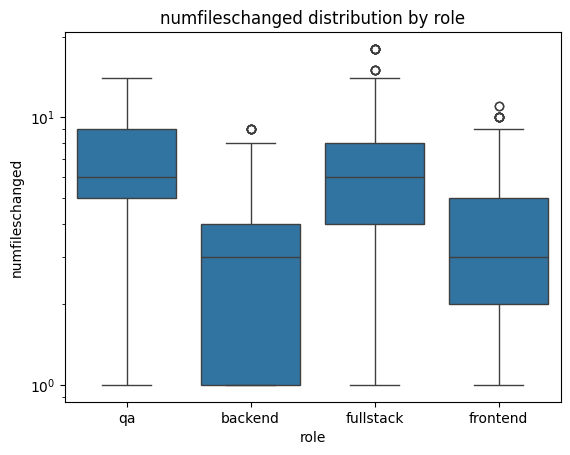

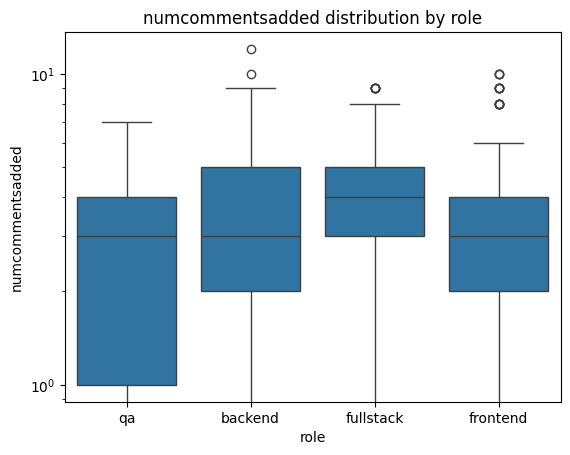

In [14]:
for col in ['linesadded','linesdeleted','numfileschanged','numcommentsadded']:
    
    sns.boxplot(data=df_clean, x='role', y=col)
    plt.title(f"{col} distribution by role")
    plt.yscale('log')   
    plt.show()


From the boxplots of raw numeric features:
1. QA commits are generally the smallest in terms of lines added or deleted but tend to span across multiple files suggesting broad but lightweight changes. 

2.Backend commits usually touch only one or two files, but involve moderately larger additions and deletions compared to QA. 

3.Fullstack commits stand out as the largest, with the highest medians for both lines added and deleted, and often span several files.

4.Frontend commits are moderate in size, overlapping with QA on the lower end of lines added but not as widespread in file changes.

5.In contrast, the number of comments added shows little distinction between roles, indicating it may not be of much use in the prediction.

In [15]:
#Binning Data 
df_clean['day']= df_clean['timeofcommit'].str.split().str[0]
df_clean['hour']= df_clean['timeofcommit'].str.split().str[1].str.split(":").str[0].astype(int)


bins=[0,6,12,18,24]
labels=["night","morning","afternoon","evening"]

df_clean['time_bin']=pd.cut(df_clean['hour'],bins=bins,labels=labels,right=False)

bins   = [0, 10, 50, 200, 1000, df_clean['linesadded'].max()]
labels = ["tiny", "small", "medium", "large", "huge"]

df_clean['linesadded_bin'] = pd.cut(df_clean['linesadded'], bins=bins, labels=labels, right=True)

bins   = [0, 10, 50, 200, 1000, df_clean['linesdeleted'].max()]
labels = ["tiny","small","medium","large","huge"]
df_clean['linesdeleted_bin'] = pd.cut(df_clean['linesdeleted'], bins=bins, labels=labels, right=True)

bins   = [-1, 0, 2, 5, df_clean['numcommentsadded'].max()]
labels = ["none","few","some","many"]
df_clean['comments_bin'] = pd.cut(df_clean['numcommentsadded'], bins=bins, labels=labels, right=True)

bins   = [0, 1, 5, 10, df_clean['numfileschanged'].max()]
labels = ["single","small","medium","large"]
df_clean['file_bin'] = pd.cut(df_clean['numfileschanged'], bins=bins, labels=labels, right=True)




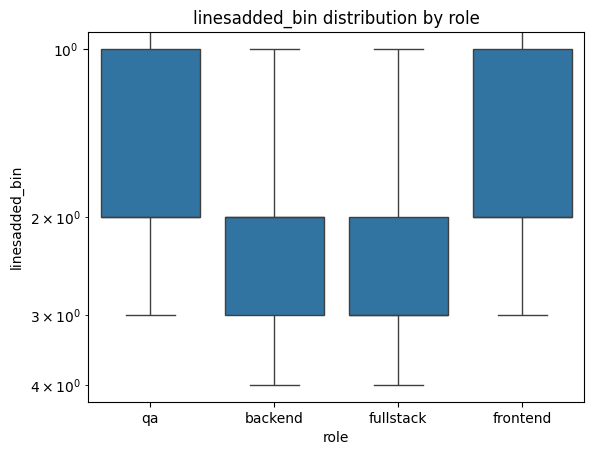

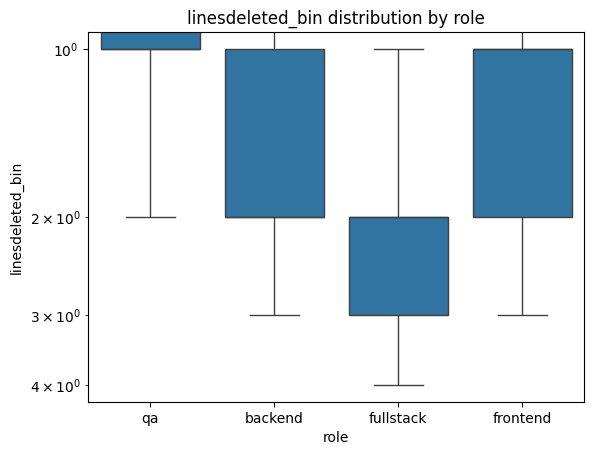

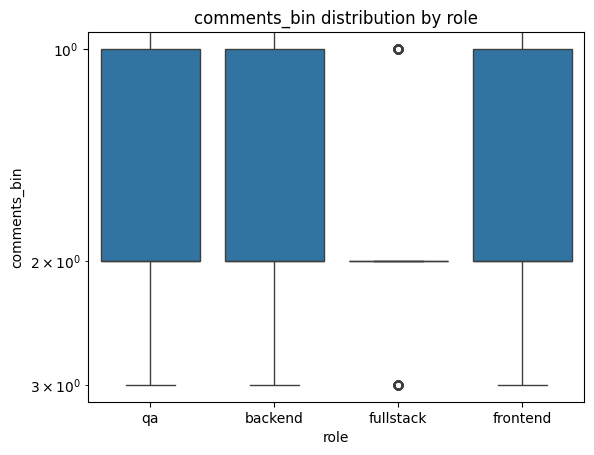

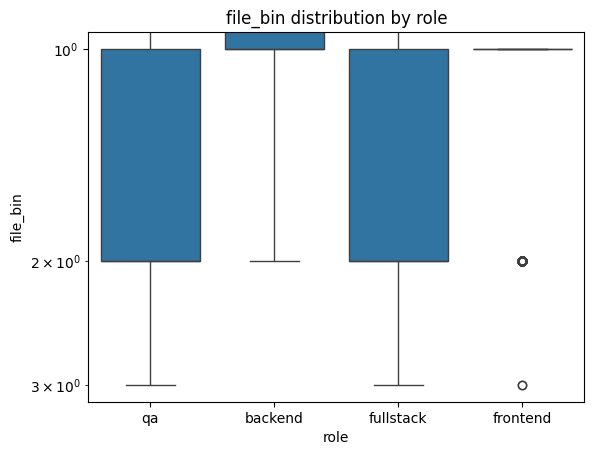

In [16]:
for col in ['linesadded_bin','linesdeleted_bin','comments_bin','file_bin']:
    
    sns.boxplot(data=df_clean, x='role', y=col)
    plt.title(f"{col} distribution by role")
    plt.yscale('log')   
    plt.show()


Binning as we can see is not that useful so we will not bin the file and comments coloumn and instead log transform all cols so that the inherit data isnt lost and for better feature extraction as we saw the boxplots previously were better off with them.
It is important to consider that differnt data behaves differently and thus, sometimes trial and error is a must.

In [17]:
df_clean['linesadded_log']   = np.log1p(df_clean['linesadded'])
df_clean['linesdeleted_log'] = np.log1p(df_clean['linesdeleted'])
df_clean['fileschanged_log'] = np.log1p(df_clean['numfileschanged'])
df_clean['comments_log']     = np.log1p(df_clean['numcommentsadded'])

df_clean.drop(columns=['timeofcommit','hour','linesadded','linesdeleted','numfileschanged','numcommentsadded','comments_bin','file_bin'],inplace=True)


In [18]:
df_clean.columns

Index(['index', 'committype', 'fileextensions', 'commitmessage', 'role', 'day',
       'time_bin', 'linesadded_bin', 'linesdeleted_bin', 'linesadded_log',
       'linesdeleted_log', 'fileschanged_log', 'comments_log'],
      dtype='object')

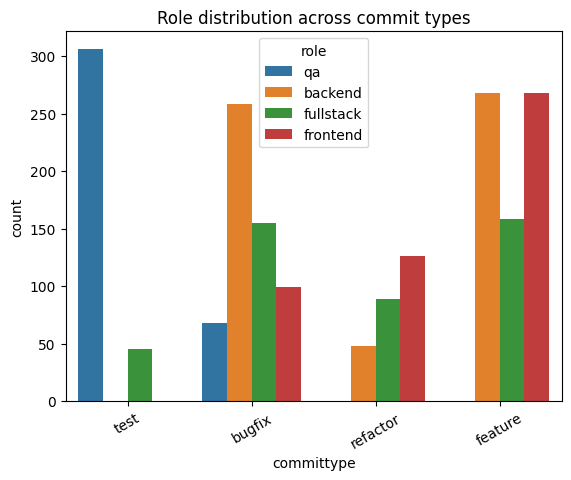

In [19]:
sns.countplot(data=df_clean, x='committype', hue='role')
plt.title("Role distribution across commit types")
plt.xticks(rotation=30)
plt.show()


This shows how different commit types (test, bugfix, refactor, feature) vary across roles. QA is heavily test-oriented, while backend and frontend dominate bugfix and feature commits, giving a strong role signal.

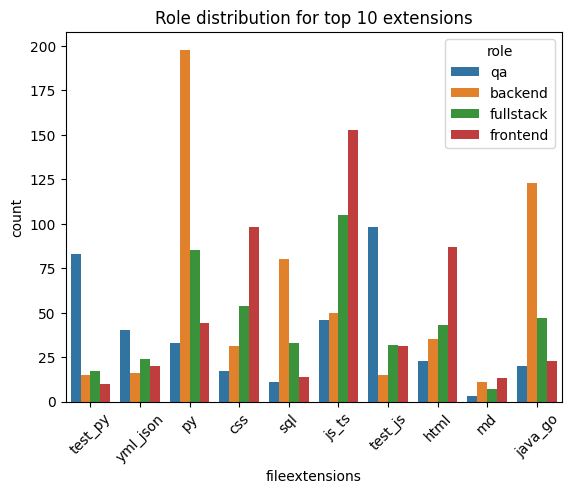

In [20]:
top_ext = df_clean['fileextensions'].value_counts().head(10).index
sns.countplot(data=df_clean[df_clean['fileextensions'].isin(top_ext)],
              x='fileextensions', hue='role')
plt.title("Role distribution for top 10 extensions")
plt.xticks(rotation=45)
plt.show()


File extensions do carry signals, but there’s still a lot of overlap across roles (e.g., .js_ts and .html appear in both frontend and fullstack). This means extensions alone aren’t enough for reliable classification.

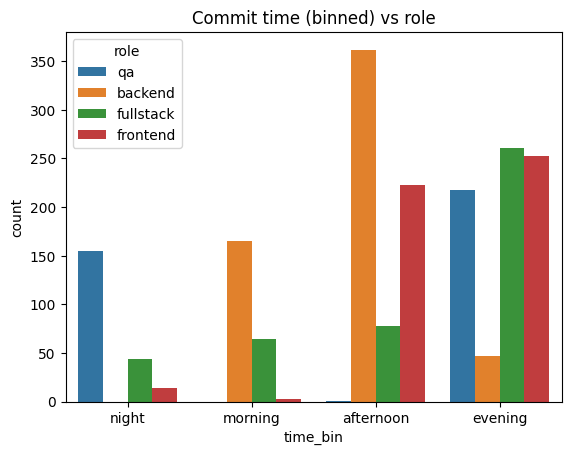

In [21]:
sns.countplot(data=df_clean, x='time_bin', hue='role')
plt.title("Commit time (binned) vs role")
plt.show()


Time-of-day patterns exist but are not strongly distinctive, as most roles show afternoon and evening peaks. The overlap suggests that time is more of a weak contextual feature than a strong predictor.

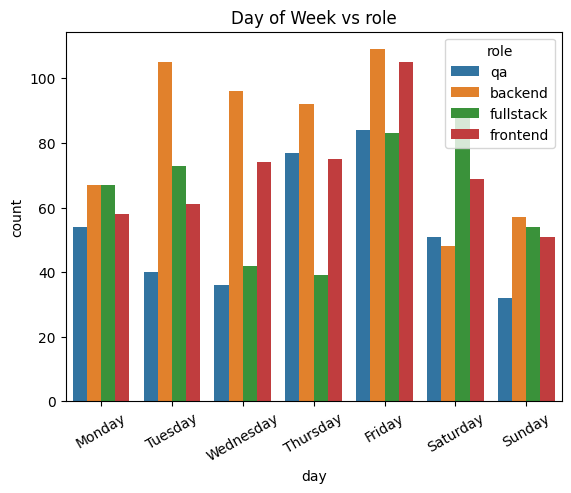

In [22]:
sns.countplot(data=df_clean, x='day', hue='role', order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Day of Week vs role")
plt.xticks(rotation=30)
plt.show()


Weekly patterns don’t show much separation — all roles are active on weekdays, with backend slightly higher on Fridays. QA and fullstack activity on weekends is noticeable but not decisive.

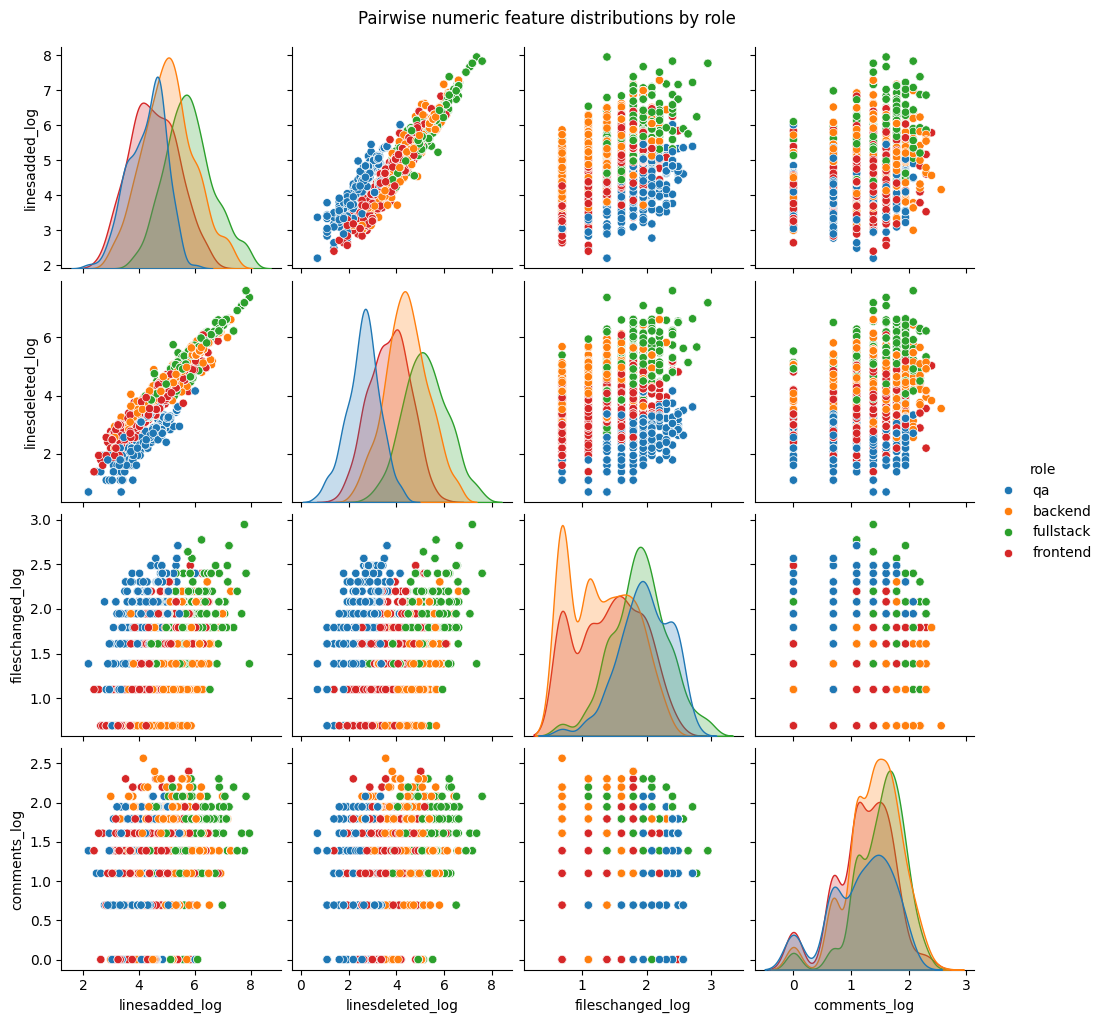

In [23]:
sns.pairplot(df_clean, vars=['linesadded_log','linesdeleted_log','fileschanged_log','comments_log'], hue='role')
plt.suptitle("Pairwise numeric feature distributions by role", y=1.02)
plt.show()


The pairwise plots show that numeric features like lines added, lines deleted, files changed, and comments added overlap a lot across roles. Backend commits are usually larger in terms of lines added/deleted, but frontend and fullstack also show similar ranges. QA commits are often smaller, though not always, since some test commits also touch many files. A strong correlation exists between lines added and deleted, which is expected.Comments have a slight skew toward QA but the separation is weak.Overall, these numeric features alone don’t clearly separate roles and are more useful as supporting features when combined with commit text or file extensions.

In [24]:

#Feature Engeneering of linesadded and deleted 
#Churn Features
df_clean['net_churn'] = df_clean['linesadded_log'] - df_clean['linesdeleted_log']   # growth vs shrink
df_clean['add_delete_ratio'] = df_clean['linesadded_log'] / (df_clean['linesdeleted_log'] + 1e-6)

#Scope Features
df_clean['files_per_line'] = (df_clean['fileschanged_log'] + 1) / (
    df_clean['linesadded_log'] + df_clean['linesdeleted_log'] + 1e-6
)


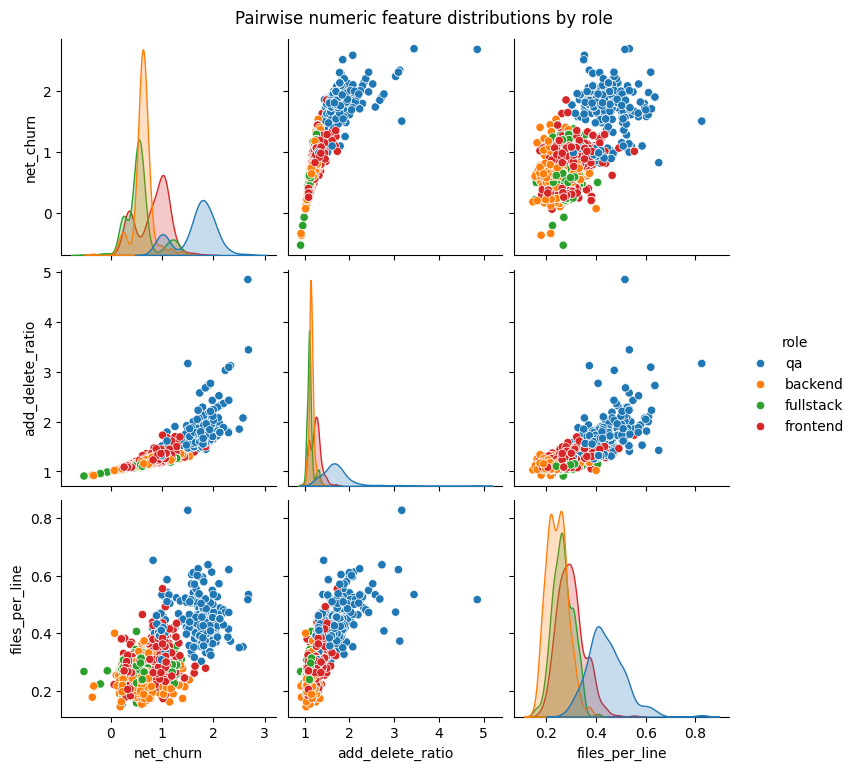

In [25]:
sns.pairplot(df_clean, vars=['net_churn','add_delete_ratio','files_per_line'], hue='role')
plt.suptitle("Pairwise numeric feature distributions by role", y=1.02)
plt.show()


The new features make sense because they describe the style of the commit instead of just raw numbers. For example, net churn shows if a commit is mostly adding code or deleting it — QA usually has small churn, while fullstack adds a lot more. Add/delete ratio tells us if the commit is mainly new code (like tests or UI features) or more balanced (like backend refactors). Files per line shows the scope of the change — QA often edits many files lightly, while backend usually changes fewer files more deeply. These give a clearer picture of how each role works and should help the model tell them apart better.

In [26]:
df_clean.head()

,index,committype,fileextensions,commitmessage,role,day,time_bin,linesadded_bin,linesdeleted_bin,linesadded_log,linesdeleted_log,fileschanged_log,comments_log,net_churn,add_delete_ratio,files_per_line
382,382,test,test_py,Refactored test_py to improve model training d...,qa,Saturday,evening,small,tiny,2.484907,1.386294,1.098612,1.098612,1.098612,1.792480,0.542109
538,538,bugfix,yml_json,"""Fixed authentication logic in backend API: co...",backend,Thursday,morning,medium,medium,4.653960,3.988984,0.693147,1.609438,0.664976,1.166703,0.195899
1493,1493,refactor,py,Refactored UI component layout to improve resp...,fullstack,Thursday,morning,small,small,3.912023,3.526361,1.098612,1.609438,0.385662,1.109365,0.282133
1493,1493,refactor,css,Refactored UI component layout to improve resp...,fullstack,Thursday,morning,small,small,3.912023,3.526361,1.098612,1.609438,0.385662,1.109365,0.282133
1112,1112,bugfix,sql,Fixed database query logic for login endpoint ...,backend,Wednesday,afternoon,large,medium,5.703782,5.093750,1.098612,1.386294,0.610032,1.119761,0.194360


In [27]:
from sklearn.preprocessing import OrdinalEncoder

line_order=["tiny","small","medium","large","huge"]

ord_enc= OrdinalEncoder(categories=[line_order,line_order])

df_clean[['linesadded_bin','linesdeleted_bin']]=ord_enc.fit_transform(df_clean[['linesadded_bin','linesdeleted_bin']])

In [28]:
df_clean

,index,committype,fileextensions,commitmessage,role,day,time_bin,linesadded_bin,linesdeleted_bin,linesadded_log,linesdeleted_log,fileschanged_log,comments_log,net_churn,add_delete_ratio,files_per_line
382,382,test,test_py,Refactored test_py to improve model training d...,qa,Saturday,evening,1.0,0.0,2.484907,1.386294,1.098612,1.098612,1.098612,1.792480,0.542109
538,538,bugfix,yml_json,"""Fixed authentication logic in backend API: co...",backend,Thursday,morning,2.0,2.0,4.653960,3.988984,0.693147,1.609438,0.664976,1.166703,0.195899
1493,1493,refactor,py,Refactored UI component layout to improve resp...,fullstack,Thursday,morning,1.0,1.0,3.912023,3.526361,1.098612,1.609438,0.385662,1.109365,0.282133
1493,1493,refactor,css,Refactored UI component layout to improve resp...,fullstack,Thursday,morning,1.0,1.0,3.912023,3.526361,1.098612,1.609438,0.385662,1.109365,0.282133
1112,1112,bugfix,sql,Fixed database query logic for login endpoint ...,backend,Wednesday,afternoon,3.0,2.0,5.703782,5.093750,1.098612,1.386294,0.610032,1.119761,0.194360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,bugfix,java_go,Fixed API endpoint to authenticate users corre...,backend,Monday,morning,2.0,2.0,4.787492,4.143135,0.693147,1.609438,0.644357,1.155524,0.189589
860,860,feature,test_js,"""Improve responsive dropdown layout on page, e...",frontend,Saturday,evening,1.0,1.0,3.688879,2.708050,0.693147,1.098612,0.980829,1.362190,0.264681
1459,1459,test,test_py,Added test case for data ingestion to verify m...,qa,Tuesday,evening,1.0,0.0,3.044522,1.098612,0.693147,0.000000,1.945910,2.771241,0.408663
1126,1126,refactor,css,Refactored dropdown button component for respo...,frontend,Saturday,afternoon,1.0,1.0,3.258097,2.995732,0.693147,0.000000,0.262364,1.087579,0.270738


In [29]:
df_time = pd.get_dummies(df_clean['time_bin'])
df_clean=pd.concat([df_clean,df_time],axis=1)

df_day=pd.get_dummies(df_clean['day'])
df_clean=pd.concat([df_clean,df_day],axis=1)
df_clean.drop(columns=['time_bin','day'], inplace=True)

In [30]:
df_clean.columns

Index(['index', 'committype', 'fileextensions', 'commitmessage', 'role',
       'linesadded_bin', 'linesdeleted_bin', 'linesadded_log',
       'linesdeleted_log', 'fileschanged_log', 'comments_log', 'net_churn',
       'add_delete_ratio', 'files_per_line', 'night', 'morning', 'afternoon',
       'evening', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

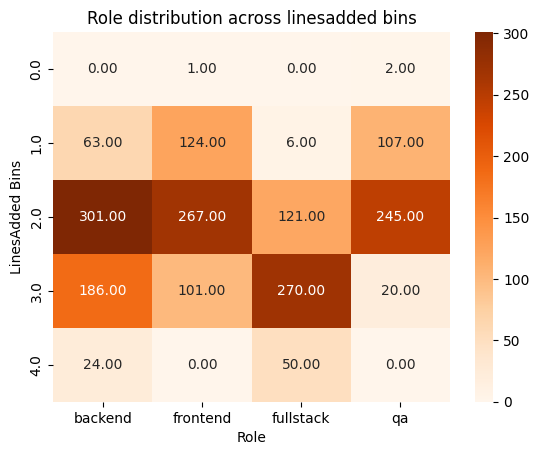

In [31]:
role_lines_prop = pd.crosstab(df_clean['linesadded_bin'], df_clean['role'])

sns.heatmap(role_lines_prop, annot=True, fmt=".2f", cmap="Oranges")
plt.title("Role distribution across linesadded bins")
plt.ylabel("LinesAdded Bins")
plt.xlabel("Role")
plt.show()

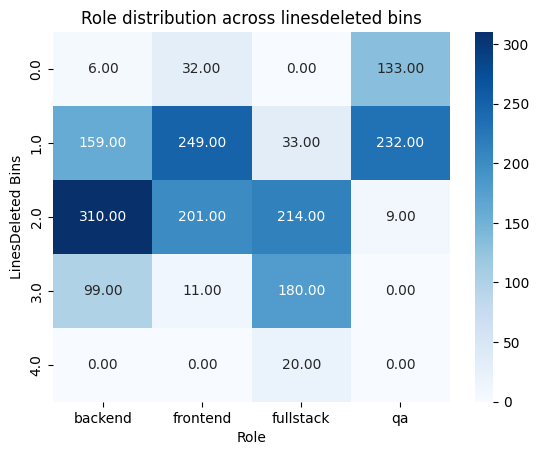

In [32]:
role_lines_prop = pd.crosstab(df_clean['linesdeleted_bin'], df_clean['role'])

sns.heatmap(role_lines_prop, annot=True, fmt=".2f", cmap="Blues")
plt.title("Role distribution across linesdeleted bins")
plt.ylabel("LinesDeleted Bins")
plt.xlabel("Role")
plt.show()

<Axes: >

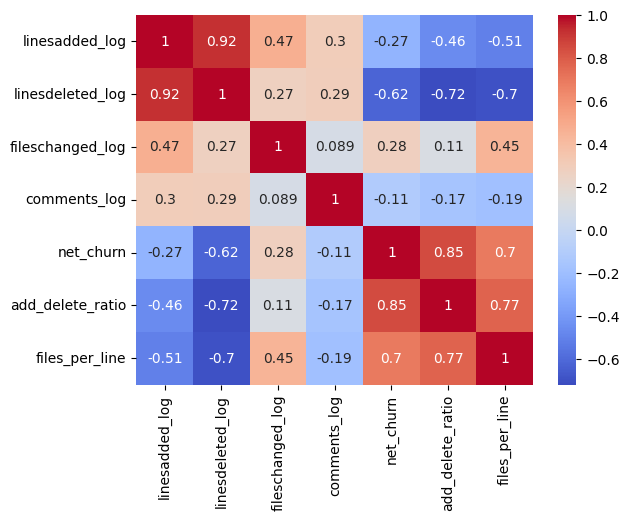

In [33]:
sns.heatmap(df_clean[['linesadded_log','linesdeleted_log','fileschanged_log','comments_log','net_churn','add_delete_ratio','files_per_line']].corr(), annot=True, cmap="coolwarm")


The correlation heatmap showed that linesadded_log and linesdeleted_log are highly correlated. Newly made features like net_churn, add_delete_ratio, and files_per_line also correlated strongly, meaning they describe similar commit scope patterns. While this consistency is reassuring, it may introduce multicollinearity in linear models. 

<Axes: xlabel='role'>

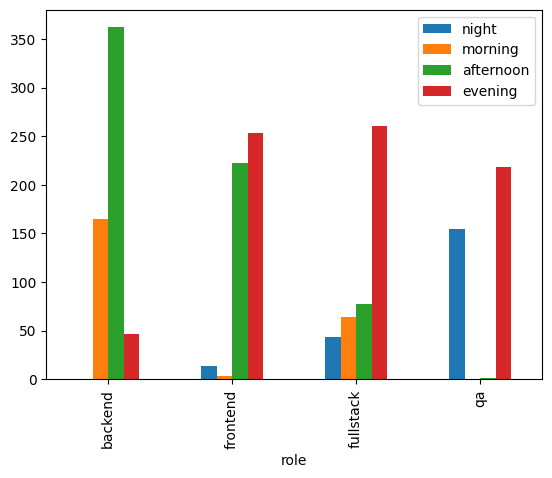

In [34]:
df_clean[['night','morning','afternoon','evening','role']].groupby('role').sum().plot(kind='bar')


Backend commits happen mainly during work hours (afternoons and mornings). Frontend commits are split between afternoons and evenings. Fullstack developers contribute across all times, showing flexibility. QA activity is skewed toward late hours (evening/night), consistent with testing before releases. This temporal pattern suggests that time-of-day features could help distinguish QA from backend roles in particular.

I performed a comprehensive EDA and cleaning task in this notebook. The dataset had no missing values or duplicates. File extension values were normalized and exploded, then grouped by role to reveal strong but non-deterministic correlations. Numeric features were heavily skewed, so I applied log-transforms and retained coarse bins for lines added/deleted. Boxplots and pairplots showed that QA commits are typically small and spread across files, while backend/fullstack commits dominate large churn. I engineered a few features (net churn, add/delete ratio, files-per-line) that captured commits more directly. Categorical variables like commit type, day, and time of commit were encoded. The only remaining steps are text cleaning/inspection of commit messages. Overall the dataset is now clean well-explored and ready for modeling.

In [35]:
df_clean

,index,committype,fileextensions,commitmessage,role,linesadded_bin,linesdeleted_bin,linesadded_log,linesdeleted_log,fileschanged_log,...,morning,afternoon,evening,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
382,382,test,test_py,Refactored test_py to improve model training d...,qa,1.0,0.0,2.484907,1.386294,1.098612,...,False,False,True,False,False,True,False,False,False,False
538,538,bugfix,yml_json,"""Fixed authentication logic in backend API: co...",backend,2.0,2.0,4.653960,3.988984,0.693147,...,True,False,False,False,False,False,False,True,False,False
1493,1493,refactor,py,Refactored UI component layout to improve resp...,fullstack,1.0,1.0,3.912023,3.526361,1.098612,...,True,False,False,False,False,False,False,True,False,False
1493,1493,refactor,css,Refactored UI component layout to improve resp...,fullstack,1.0,1.0,3.912023,3.526361,1.098612,...,True,False,False,False,False,False,False,True,False,False
1112,1112,bugfix,sql,Fixed database query logic for login endpoint ...,backend,3.0,2.0,5.703782,5.093750,1.098612,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,bugfix,java_go,Fixed API endpoint to authenticate users corre...,backend,2.0,2.0,4.787492,4.143135,0.693147,...,True,False,False,False,True,False,False,False,False,False
860,860,feature,test_js,"""Improve responsive dropdown layout on page, e...",frontend,1.0,1.0,3.688879,2.708050,0.693147,...,False,False,True,False,False,True,False,False,False,False
1459,1459,test,test_py,Added test case for data ingestion to verify m...,qa,1.0,0.0,3.044522,1.098612,0.693147,...,False,False,True,False,False,False,False,False,True,False
1126,1126,refactor,css,Refactored dropdown button component for respo...,frontend,1.0,1.0,3.258097,2.995732,0.693147,...,False,True,False,False,False,True,False,False,False,False


In [36]:
df_clean['commitmessage'][0]

'"Implement responsive UI component with dropdown and modal functionality, enhancing navigation and theme style across the page, with improved CSS and animation effects"'

In [37]:
df_try=df.copy()
df_try['commitmessage']=df_try['commitmessage'].apply(lambda x:x.lower())

In [38]:
df_try['commitmessage'][0]

'"implement responsive ui component with dropdown and modal functionality, enhancing navigation and theme style across the page, with improved css and animation effects"'

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y=encoder.fit_transform(y)
X=df_try['commitmessage']
print(len(X),len(y))

1200 1500
